<a href="https://colab.research.google.com/github/EduardoMoraesRitter/introducao_Deep_Learning_keras_tensorflow/blob/master/tensoflow_classificacao_resumida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

https://www.digitalocean.com/community/tutorials/como-construir-um-classificador-de-machine-learning-em-python-com-scikit-learn-pt

https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/

In [1]:
#keras esta dentro do tensorflow
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

imagens_treino_normalizado = imagens_treino/float(255)
imagens_teste_normalizado = imagens_teste/float(255)

print(len(imagens_treino_normalizado))
print(len(imagens_teste_normalizado))
print(imagens_treino.shape)

4423680/4422102 [==============================] - 0s 0us/step
60000
10000
(60000, 28, 28)


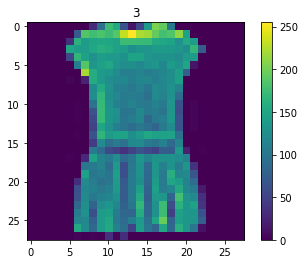

In [2]:
plt.imshow(imagens_treino[3])
plt.title(identificacoes_treino[3])
plt.colorbar()

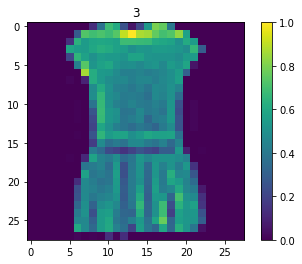

In [3]:
plt.imshow(imagens_treino_normalizado[3])
plt.title(identificacoes_treino[3])
plt.colorbar()

In [4]:
modelo = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5300 - accuracy: 0.8131 - val_loss: 0.4170 - val_accuracy: 0.8514
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8554 - val_loss: 0.3684 - val_accuracy: 0.8674
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3616 - accuracy: 0.8678 - val_loss: 0.3656 - val_accuracy: 0.8673
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3408 - accuracy: 0.8746 - val_loss: 0.3435 - val_accuracy: 0.8763
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3225 - accuracy: 0.8815 - val_loss: 0.3388 - val_accuracy: 0.8762
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3099 - accuracy: 0.8846 - val_loss: 0.3262 - val_accuracy: 0.8820
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2976 - accuracy: 0.8879 - val_loss: 0.3255 - val_accuracy:

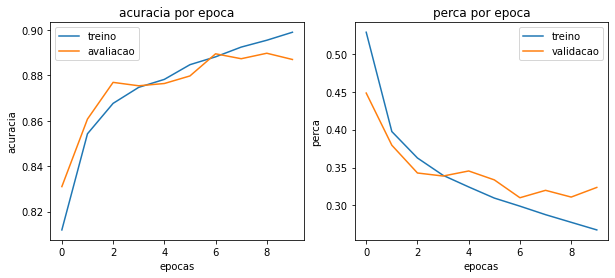

In [6]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

#visualizar a acuracia conforme o treino
axs[0].plot(historico.history['accuracy'])
axs[0].plot(historico.history['val_accuracy'])
axs[0].set_title('acuracia por epoca')
axs[0].set_xlabel('epocas')
axs[0].set_ylabel('acuracia')
axs[0].legend(['treino', 'avaliacao'])

#visualizar a perca conforme o treino
axs[1].plot(historico.history['loss'])
axs[1].plot(historico.history['val_loss'])
axs[1].set_title('perca por epoca')
axs[1].set_xlabel('epocas')
axs[1].set_ylabel('perca')
axs[1].legend(['treino', 'validacao'])

In [0]:
modelo.save('modelo.h5')
modelo_carregado = load_model('modelo.h5', compile=False)

In [8]:
testes = modelo_carregado.predict(imagens_teste_normalizado)

print("teste: ", np.argmax(testes[0]))
print("real: ", identificacoes_teste[0])

teste:  9
real:  9


testes de quantidade de itens

In [9]:
modelo = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino_normalizado[:60000], identificacoes_treino[:60000])

1875/1875 [==============================] - 5s 3ms/step - loss: 0.5067 - accuracy: 0.8189
